## Project - California Housing Price Prediction 
 
Description : 
 
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it. 
 
Background of the Problem Statement : 
 
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics. 
 
Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset. 
    
    Domain :​ Finance and Housing 
    Dataset Description : 
 
Data Dictionary – Variable and Description 
     
     ● longitude​ (signed numeric - float) ​:​ Longitude value for the block in California, USA 
     ● latitude​ (numeric - float ) ​:​ Latitude value for the block in California, USA 
     ● housing_median_age​ (numeric - int ) ​:​ Median age of the house in the block 
     ● total_rooms​ (numeric - int ) ​:​ Count of the total number of rooms (excluding bedrooms) in all houses in the block 
     ● total_bedrooms​ (numeric - float ) ​:​ Count of the total number of bedrooms in all houses in the block 
     ● population​ (numeric - int ) ​:​ Count of the total number of population in the block 
     ● households​ (numeric - int ) ​:​ Count of the total number of households in the block 
     ● median_income​ (numeric - float ) ​:​ Median of the total household income of all the houses in the block 
     ● ocean_proximity​ (numeric - categorical ) ​:​ Type of the landscape of the block [​ Unique Values ​:​ ​'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ​] 
     ● median_house_value​ (numeric - int ) ​:​ Median of the household prices of all the houses in the block 
     
Dataset Size :​ ​20640 rows x 10 columns 
 
Questions to be answered with analysis : 
 
1. Build a model of housing prices to predict median house values in California using the provided dataset. 
 
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics. 
 
3. Predict housing prices based on median_income and plot the regression chart for it. 
 
 
Project Guidelines : 
 1. ​Load the data : 
         ● Read the ​“housing.csv”​ file from the folder into the program. 
         ● Print first few rows of this data. 
         ● Extract input (X) and output (Y) data from the dataset. 
         
 2. ​Handle missing values : 
     
         ● Fill the missing values with the mean of the respective column. 
 3. ​Encode categorical data : 
     
         ● Convert categorical column in the dataset to numerical data. 
 4. ​Split the dataset :  
     
         ● Split the data into 80% training dataset and 20% test dataset. 
 5. ​Standardize data : 
     
         ● Standardize training and test datasets. 
 6. ​Perform Linear Regression :  
         
         ● Perform Linear Regression on training data. 
         ● Predict output for test dataset using the fitted model. 
         ● Print root mean squared error (RMSE) from Linear Regression.             
         [ HINT: Import ​mean_squared_error​ from ​sklearn.metrics​ ] 
 
 7. ​Perform Decision Tree Regression : 
 
         ● Perform Decision Tree Regression on training data. 
         ● Predict output for test dataset using the fitted model. 
         ● Print root mean squared error from Decision Tree Regression. 
 
 
 
 8. ​Perform Random Forest Regression : 
 
         ● Perform Random Forest Regression on training data. 
         ● Predict output for test dataset using the fitted model. 
         ● Print RMSE (root mean squared error) from Random Forest Regression. 

 9. ​Bonus exercise: Perform Linear Regression with one independent variable :
 
         ● Extract just the median_income column from the independent variables (from ​X_train​ and ​X_test​). 
         ● Perform Linear Regression to predict housing values based on ​median_income​. 
         ● Predict output for test dataset using the fitted model. 
         ● Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data. 

### 1. Load the data : 
     
         ● Read the ​“housing.csv”​ file from the folder into the program. 
         ● Print first few rows of this data. 
         ● Extract input (X) and output (Y) data from the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### 2. Handle missing values : 
          
          ● Fill the missing values with the mean of the respective column. 

In [7]:
data.fillna(data.total_bedrooms.mean(),inplace=True)

In [8]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### 3. Encode categorical data : 
       ● Convert categorical column in the dataset to numerical data. 

In [9]:
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

In [10]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
features[:,-1] = le.fit_transform(features[:,-1])
np.unique(features[:,-1])

array([0, 1, 2, 3, 4], dtype=object)

In [12]:
ohe = OneHotEncoder(categorical_features = [8])
features = ohe.fit_transform(features).toarray()
features

C:\Users\nilesh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\nilesh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2200e+02, 1.2600e+02,
        8.3252e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.4010e+03, 1.1380e+03,
        8.3014e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.9600e+02, 1.7700e+02,
        7.2574e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.3870e+03, 5.3000e+02,
        2.3886e+00]])

### 4 Standardize data : 
     ● Standardize training and test datasets. 

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
#x_test = sc.fit_transform(x_test)

### 5 Split the dataset : 
     ● Split the data into 80% training dataset and 20% test dataset. 

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features , 
                                                       label , 
                                                       test_size = 0.2,
                                                       random_state = 3)

### 6 Perform Linear Regression : 
     ● Perform Linear Regression on training data. 
     ● Predict output for test dataset using the fitted model. 
     ● Print root mean squared error (RMSE) from Linear Regression.             
     [ HINT: Import ​mean_squared_error​ from ​sklearn.metrics​ ] 

In [15]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
print("training data score = ",linear_model.score(x_train,y_train))
print("testing data score = ",linear_model.score(x_test,y_test))

training data score =  0.6434896747348795
testing data score =  0.6532135204623276


In [16]:
linear_model.predict(x_test)

array([[201335.87972384],
       [ 56975.87972384],
       [200591.87972384],
       ...,
       [340411.87972384],
       [167823.87972384],
       [160935.87972384]])

In [17]:
from sklearn.metrics import mean_squared_error

RMSE = sqrt(mean_squared_error(y_test , linear_model.predict(x_test)))
print("RMSE = ", RMSE)

RMSE =  67724.70092158735


### 7 Perform Decision Tree Regression : 
     ● Perform Decision Tree Regression on training data. 
     ● Predict output for test dataset using the fitted model. 
     ● Print root mean squared error from Decision Tree Regression.  

In [18]:
from sklearn.tree import DecisionTreeRegressor
Dt = DecisionTreeRegressor()
Dt.fit(x_train,y_train)
print("training data score = ",Dt.score(x_train,y_train))
print("testing data score = ",Dt.score(x_test,y_test))

from sklearn.metrics import mean_squared_error

RMSE = sqrt(mean_squared_error(y_test , Dt.predict(x_test)))
print("RMSE = ", RMSE)

training data score =  1.0
testing data score =  0.6730023771759431
RMSE =  65764.01430023705


### 8 Perform Random Forest Regression : 
     ● Perform Random Forest Regression on training data. 
     ● Predict output for test dataset using the fitted model. 
     ● Print RMSE (root mean squared error) from Random Forest Regression. 

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features , 
                                                       label , 
                                                       test_size = 0.2,
                                                       random_state = 3)

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=110)
rf.fit(x_train,y_train)
print("training data score = ",rf.score(x_train,y_train))
print("testing data score = ",rf.score(x_test,y_test))


from sklearn.metrics import mean_squared_error

RMSE = sqrt(mean_squared_error(y_test , rf.predict(x_test)))
print("RMSE = ", RMSE)

C:\Users\nilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


training data score =  0.9748077920440683
testing data score =  0.828107278132653
RMSE =  47680.9348378068


### 9 Bonus exercise: Perform Linear Regression with one independent variable :
     ● Extract just the median_income column from the independent variables (from ​X_train​ and ​X_test​). 
     ● Perform Linear Regression to predict housing values based on ​median_income​. 
     ● Predict output for test dataset using the fitted model. 
     ● Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [21]:
feature = features[:,[-1]]
feature

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

In [22]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test = train_test_split(feature ,
                               label , 
                               test_size = 0.2,
                               random_state = 89)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train1,y_train)
print("training data score = ",LR.score(x_train1,y_train))
print("testing data score = ",LR.score(x_test1,y_test))


training data score =  0.4716438566181046
testing data score =  0.4807281538747354


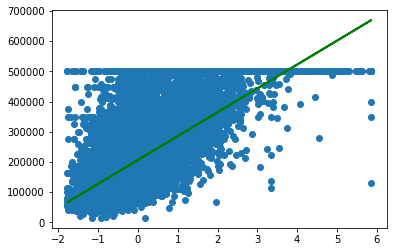

In [23]:
plt.scatter(x_train1, y_train)
plt.plot(x_train1 , LR.predict(x_train1),color='green',linewidth=2)

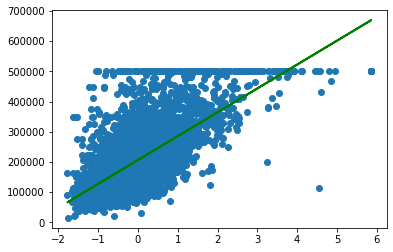

In [24]:
plt.scatter(x_test1, y_test)
plt.plot(x_test1 , LR.predict(x_test1),color='green',linewidth=2)

fitted model is only 0.48 satisfies the test data